# Выбор локации для скважины

Мы работаем в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируем возможную прибыль и риски техникой Bootstrap.

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
#! pip install phik

In [2]:
import pandas as pd

import numpy as np

from scipy import stats as st

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

import matplotlib
import matplotlib.pyplot as plt

import phik
from phik import report
from phik.report import plot_correlation_matrix

import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
pd.options.mode.chained_assignment = None

In [5]:
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [6]:
print(df_0.info())
print(df_1.info())
print(df_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  

Пропуски отсутствуют

In [7]:
# Сделаем id скважин индексами таблиц
df_0 = df_0.set_index('id')
df_1 = df_1.set_index('id')
df_2 = df_2.set_index('id')
print(df_0.head())

             f0        f1        f2     product
id                                             
txEyH  0.705745 -0.497823  1.221170  105.280062
2acmU  1.334711 -0.340164  4.365080   73.037750
409Wp  1.022732  0.151990  1.419926   85.265647
iJLyR -0.032172  0.139033  2.978566  168.620776
Xdl7t  1.988431  0.155413  4.751769  154.036647


In [8]:
dfs = [df_0, df_1, df_2]

In [9]:
matplotlib.rcParams.update({'font.size': 14})

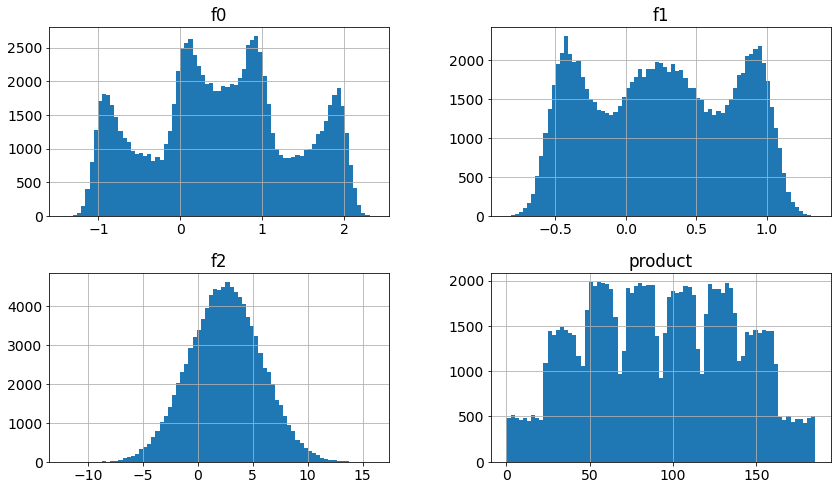

In [10]:
# Посмотрим на распределение значений
df_0.hist(figsize=(14,8), bins=75);

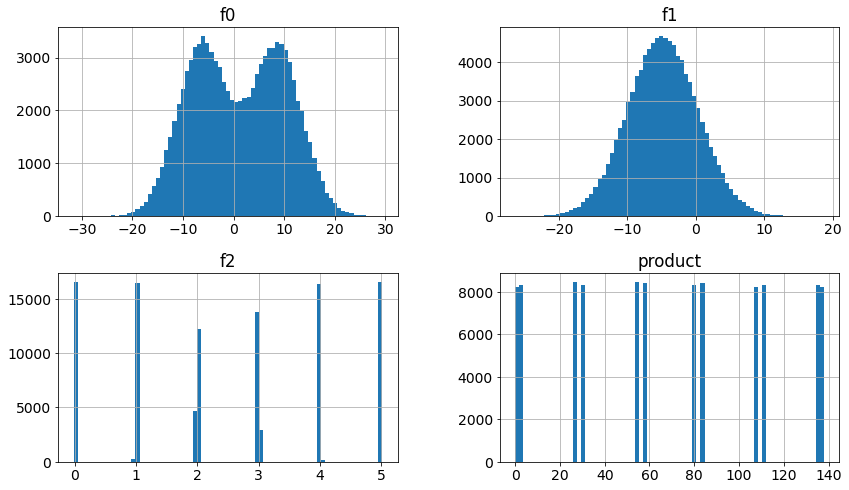

In [11]:
df_1.hist(figsize=(14,8), bins=75);

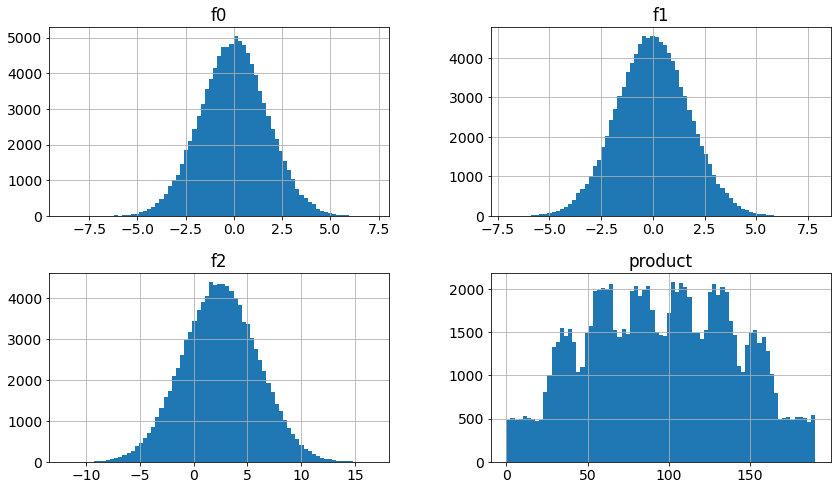

In [12]:
df_2.hist(figsize=(14,8), bins=75);

In [13]:
data_types = {'f0':'interval',
             'f1':'interval',
             'f2':'interval',
             'product':'interval'}

interval_cols = [col for col, v in data_types.items() if v=='interval' and col in df_0.columns]

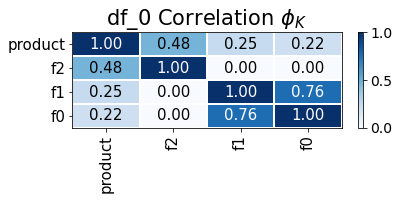

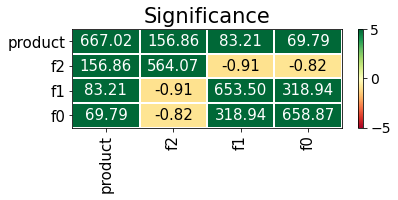

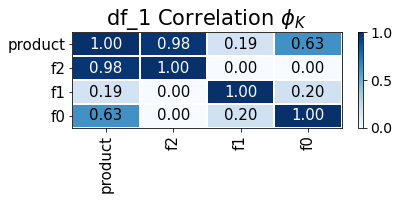

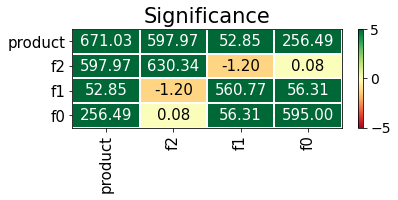

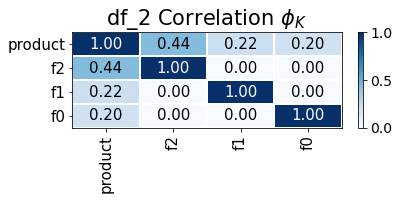

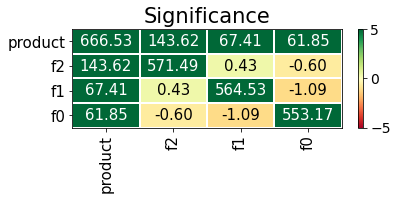

In [14]:
# Посмотрим на корреляции

phik_overview = df_0.phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'df_0 Correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(6, 3))

significance_overview = df_0.significance_matrix(interval_cols=interval_cols)

plot_correlation_matrix(significance_overview.fillna(0).values, x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, vmin=-5, vmax=5, title='Significance', 
                        usetex=False, fontsize_factor=1.5, figsize=(6,3))

phik_overview = df_1.phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'df_1 Correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(6, 3))

significance_overview = df_1.significance_matrix(interval_cols=interval_cols)

plot_correlation_matrix(significance_overview.fillna(0).values, x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, vmin=-5, vmax=5, title='Significance', 
                        usetex=False, fontsize_factor=1.5, figsize=(6,3))

phik_overview = df_2.phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'df_2 Correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(6, 3))

significance_overview = df_2.significance_matrix(interval_cols=interval_cols)

plot_correlation_matrix(significance_overview.fillna(0).values, x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, vmin=-5, vmax=5, title='Significance', 
                        usetex=False, fontsize_factor=1.5, figsize=(6,3))

plt.tight_layout()

В каждом из регионов прослеживается корреляция объёма запасов в скважинах с одним из признаков:
- для первого региона - слабая с f2;
- для второго региона - очень высокая с f2, средняя с f0;
- для третьего региона - слабая с f2.

In [16]:
print(f'Количество полных дубликатов:')
for i, df in enumerate(dfs):
    print(f'В данных региона №{i}: {df.duplicated().sum()}')

Количество полных дубликатов:
В данных региона №0: 0
В данных региона №1: 0
В данных региона №2: 0


Полные дубликаты отсутствуют

## Обучение и проверка модели

In [17]:
# сохраним значение random_state
random_state = 11363

In [19]:
# Создадим функцию для выделения таблиц с признаками и таргетом, а также разбития данных на обучающую, валидационную выборки 

def ftr_trg_splt(df, target_column, test_size, random_state):
    features = df.drop(target_column, axis=1)
    target = df[target_column]
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=test_size, random_state=random_state)
    return features_train, features_valid, target_train, target_valid

In [20]:
ft = []
fv = []
tt = []
tv = []
pv = []

for i in range(3):
    ft_t, fv_t, tt_t, tv_t = ftr_trg_splt(dfs[i], 'product', 0.25, random_state)
    ft.append(ft_t)
    fv.append(fv_t)
    tt.append(tt_t)
    tv.append(tv_t)

# Не понимаю как сделать иначе, кроме как через append и временные переменные ft_t, fv_t, etc.
# Так как назначать элементам списка возвращаемые значения функцией не получается, 
# тк списки пустые, т.е i-го элемента списков не существует, ниже пример как пытался делать:
# ft[i], fv[i], tt[i], tv[i] =  ftr_trg_splt(dfs[i], 'product', 0.25, random_state)

for i in range(3):
    print(f'Формат обучающих выборок региона {i}: {ft[i].shape}, {tt[i].shape}')
    print(f'Формат валидационных выборок региона 0: {fv[i].shape}, {tv[i].shape}\n')

Формат обучающих выборок региона 0: (75000, 3), (75000,)
Формат валидационных выборок региона 0: (25000, 3), (25000,)

Формат обучающих выборок региона 1: (75000, 3), (75000,)
Формат валидационных выборок региона 0: (25000, 3), (25000,)

Формат обучающих выборок региона 2: (75000, 3), (75000,)
Формат валидационных выборок региона 0: (25000, 3), (25000,)



In [21]:
# масштабируем признаки
numerical_features = ['f0', 'f1', 'f2']

scaler = StandardScaler()

for i in range(len(tt)):
    scaler.fit(ft[i][numerical_features])
    ft[i][numerical_features] = scaler.transform(ft[i][numerical_features])
    fv[i][numerical_features] = scaler.transform(fv[i][numerical_features])

In [22]:
ft_poly = []
fv_poly = []

poly_features = PolynomialFeatures(include_bias=False)

for i in range(3):
    poly_features.fit(ft[i][numerical_features])
    ft_poly.append(poly_features.transform(ft[i][numerical_features]))
    fv_poly.append(poly_features.transform(fv[i][numerical_features]))
    print(f'Формат трансформированных обучающей и валидационной выборок региона {i}: {ft_poly[i].shape}, {fv_poly[i].shape}')

Формат трансформированных обучающей и валидационной выборок региона 0: (75000, 9), (25000, 9)
Формат трансформированных обучающей и валидационной выборок региона 1: (75000, 9), (25000, 9)
Формат трансформированных обучающей и валидационной выборок региона 2: (75000, 9), (25000, 9)


In [23]:
# Обучим модель линейной регрессии для каждого региона и оценим значения MAE и RMSE
model = LinearRegression()

pv = [] # predictions_valid
pv_poly = [] # predictions_valid with polynomial features

for i in range(len(tt)):
    model.fit(ft[i], tt[i])
    pv.append(model.predict(fv[i]))
    model.fit(ft_poly[i], tt[i])
    pv_poly.append(model.predict(fv_poly[i]))
    print(f'            ---Регион № {i}---')
    #print(f'Средний запас предсказанного сырья = {pv[i].mean():.2f}')
    print(f'Avg product: base_features = {pv[i].mean():.2f} | poly_features = {pv_poly[i].mean():.2f}')
    print(f'MAE:         base_features = {mean_absolute_error(tv[i], pv[i]):5.2f} | poly_features = {mean_absolute_error(tv[i], pv_poly[i]):5.2f}')
    print(f'RMSE:        base_features = {mean_squared_error(tv[i], pv[i]) ** 0.5:5.2f} | poly_features = {mean_squared_error(tv[i], pv_poly[i]) ** 0.5:5.2f}\n')

            ---Регион № 0---
Avg product: base_features = 92.65 | poly_features = 92.65
MAE:         base_features = 31.24 | poly_features = 31.24
RMSE:        base_features = 37.87 | poly_features = 37.87

            ---Регион № 1---
Avg product: base_features = 68.87 | poly_features = 68.87
MAE:         base_features =  0.72 | poly_features =  0.72
RMSE:        base_features =  0.90 | poly_features =  0.90

            ---Регион № 2---
Avg product: base_features = 95.09 | poly_features = 95.11
MAE:         base_features = 32.94 | poly_features = 32.02
RMSE:        base_features = 40.16 | poly_features = 38.82



In [24]:
# Создадим список результирующих таблиц, содержащих целевые значения валидационной выборки и предсказания
result_0 = pd.DataFrame()
result_1 = pd.DataFrame()
result_2 = pd.DataFrame()

rslt = [result_0, result_1, result_2]

In [25]:
for i in range(3):
    rslt[i] = pd.DataFrame({'predictions_valid':pv_poly[i],
                               'product':tv[i]},
                                index=tv[i].index)

Наибольшие объёмы предказаны в регионах №0 и №2, однако RMSE этих моделей имеют высокие значения.
Регион №1 же имеет низкое значение RMSE, что говорит о высокой точности модели.

## Подготовка к расчёту прибыли

Для безубыточной разработки новой скважины, затраты на разработку региона должны покрываться суммарным доходом.

In [26]:
budget = 10 * 10 ** 9 # общий бюджет на разработку региона
income_per_1k_barrel = 450 * 10 ** 3 # доход с 1 тыс. баррелей в рублях
oill_wells_amount = 200 # количество скважин по условию
turnover_volume = budget/income_per_1k_barrel # необходимый объём в регионе для достижения безубыточности, тыс. баррелей
turnover_volume_per_oill_well = turnover_volume / oill_wells_amount # необходимый средний объём в одной скважине для достижения безубыточности, тыс. баррелей 
print(f'Для достижения безубыточности необходимо разрабатывать скважины со средним объёмом не меньшим, чем {turnover_volume_per_oill_well:.2f} тыс. баррелей.')

Для достижения безубыточности необходимо разрабатывать скважины со средним объёмом не меньшим, чем 111.11 тыс. баррелей.


In [27]:
# Посмотрим на средние значения запасыв сырья в регионах
print('Средние значения запасов сырья в регионах:')
for i in range(3):
    print(f'Регион №{i} = {dfs[i]["product"].mean():.2f} тыс. баррелей')

Средние значения запасов сырья в регионах:
Регион №0 = 92.50 тыс. баррелей
Регион №1 = 68.83 тыс. баррелей
Регион №2 = 95.00 тыс. баррелей


Среднего объёма недостаточно для проведения разработки, в следующем разделе оценим потенциальную прибыль по лучшим 200 шахтам из 500 случайно выбранных 1000 раз на базе предсказаний модели.

## Расчёт прибыли и рисков 

In [28]:
# создадим функцию для расчёта прибыли по выбранным скважинам и предсказания модели
def get_revenue(result, amount):
    sortedp = result.sort_values('predictions_valid', ascending=False)
    top = sortedp.head(amount)['product'].sum()
    revenue = top * income_per_1k_barrel
    profit = revenue - budget
    return profit

In [30]:
print('Прибыль по фактическим объёмам на базе предсказаний модели:\n')
for i in range(3):
    print(f'Регион №{i} = {get_revenue(rslt[i], oill_wells_amount):13,.0f} руб.')

Прибыль по фактическим объёмам на базе предсказаний модели:

Регион №0 = 3,426,660,152 руб.
Регион №1 = 2,415,086,697 руб.
Регион №2 = 2,954,126,651 руб.


Каждый из регионов преодолевает порог стоимости разработки.

In [31]:
# найдём распределение прибыли и среднюю прибыль
state = np.random.RandomState(12345)

revenues = [[],[],[]]
lowers = []
uppers = []

for j in range(3):
    total = 0
    for i in range(1000):
        subsample = rslt[j].sample(n=500,replace=True,random_state=state)
        revenue = get_revenue(subsample, oill_wells_amount)
        revenues[j].append(revenue)
        total += revenues[j][i]
    lower = pd.Series(revenues[j]).quantile(0.025)
    upper = pd.Series(revenues[j]).quantile(0.975)
    lowers.append(lower)
    uppers.append(upper)
    print (f'Регион №{j} | Среднее значение прибыли = {total/len(revenues[j]):11,.0f} руб. | 95%-ый доверительный интервал от {lower:13,.0f} до {upper:13,.0f} руб.')

Регион №0 | Среднее значение прибыли = 450,471,336 руб. | 95%-ый доверительный интервал от   -57,531,734 до   921,563,422 руб.
Регион №1 | Среднее значение прибыли = 439,842,796 руб. | 95%-ый доверительный интервал от    53,883,066 до   838,027,032 руб.
Регион №2 | Среднее значение прибыли = 588,121,076 руб. | 95%-ый доверительный интервал от    50,075,467 до 1,088,512,518 руб.


In [32]:
# произведём расчёт рисков
risks = []
for j in range(3):
    count = 0
    for i in range(len(revenues[j])):
        if revenues[j][i] < 0:
            count += 1
    risks.append(count/len(revenues[j]))
    print(f'В регионе №{j} уровень риска = {risks[j]:5.2%}')

В регионе №0 уровень риска = 4.10%
В регионе №1 уровень риска = 1.10%
В регионе №2 уровень риска = 1.50%


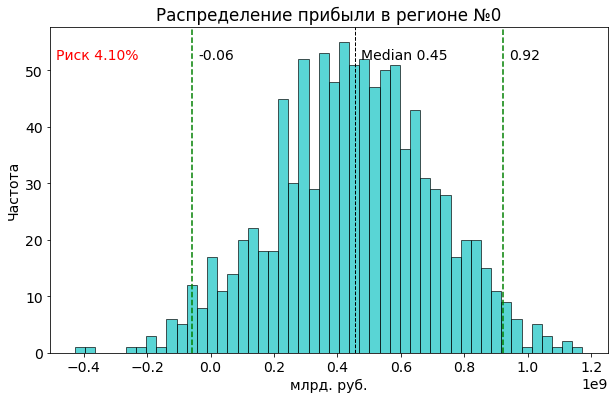

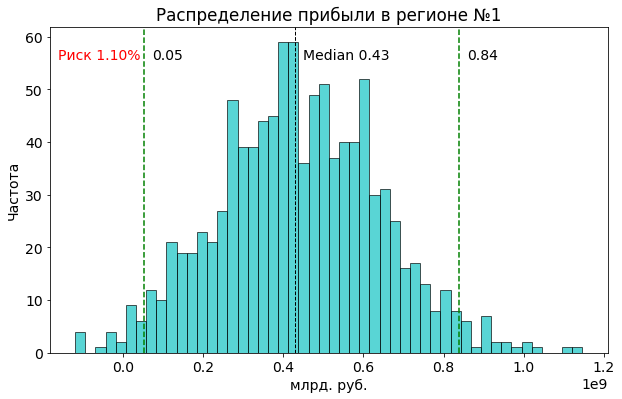

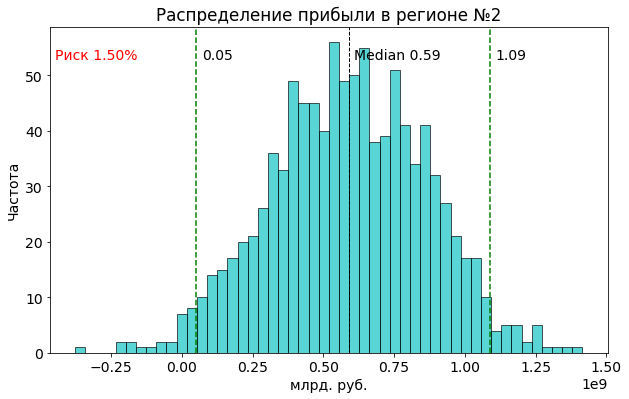

In [33]:
for i in range(len(revenues)):
    plt.figure(figsize=(10, 6))
    plt.hist(revenues[i], bins=50, color='c', edgecolor='k', alpha=0.65)
    
    plt.axvline(lowers[i], color='g', linestyle='dashed', linewidth=1.5)
    plt.axvline(uppers[i], color='g', linestyle='dashed', linewidth=1.5)
    plt.axvline(pd.Series(revenues[i]).median(), c='k', linestyle='dashed', linewidth=1)
    
    min_xlim, max_xlim = plt.xlim()
    min_ylim, max_ylim = plt.ylim()
    
    plt.text(lowers[i]+0.2*10**8, max_ylim*0.9, '{:.2f}'.format(lowers[i]/(10**9)))
    plt.text(uppers[i]+0.2*10**8, max_ylim*0.9, '{:.2f}'.format(uppers[i]/(10**9)))
    plt.text(min_xlim+0.2*10**8, max_ylim*0.9, 'Риск {:.2%}'.format(risks[i]), c='r')
    plt.text(pd.Series(revenues[i]).median()+0.2*10**8, max_ylim*0.9, 'Median {:.2f}'.format(pd.Series(revenues[i]).median()/(10**9)))
    
    plt.title(f'Распределение прибыли в регионе №{i}')
    plt.xlabel('млрд. руб.')
    plt.ylabel('Частота')
    
    plt.show()

Прибыль по фактическим объёмам на базе предсказаний модели, млрд. руб.: 3.43, 2.42, 2.95.  
Рекомендуется выбрать регион №2 как обладающий:
- наибольшим медианным значением распределения прибыли 0.59 млрд. руб. против 0.45 и 0.43 млрд. руб. в регионах №0 и №1 соответственно;
- приемлемым риском в 1.5% против 4.1% и 1.1%;
- наиболее привлекательными границами доверительного интервала [0.05:1.09] млрд. руб. против [-0.06:0.92] и [0.05:0.84].